# Scratch Logistic Regression vs Sk-learn Logistic Regression with the Sk-learn Breast Cancer Dataset for Binary Classification

In this notebook I will test the logistic regression algorithm made from scratch vs the Sk-learn Logistic Regression, the notebook has the following sections:
1. Load the data 
2. Explore the data
3. Create the Scratch Logistic Regression model
4. Create the Sk-learn Logistic Regression model
5. Compare the results

In [1]:
# Sk-learn Utilities
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, log_loss, confusion_matrix
import time

# Logistic Regression Scratch Model
from logistic_regression import LogisticRegression
import numpy as np

# Print tabulate data and plots
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
X.shape, y.shape

((569, 30), (569,))

In [3]:
# Print the first 7 columns of the data and the type
headers = list(data.feature_names)[:7]
headers.append('Type')

table = print(tabulate(np.concatenate((X[:, :7], y.reshape(-1,1)), axis=1), 
                       headers=headers,
                       tablefmt='rounded_grid')
              )
table

╭───────────────┬────────────────┬──────────────────┬─────────────┬───────────────────┬────────────────────┬──────────────────┬────────╮
│   mean radius │   mean texture │   mean perimeter │   mean area │   mean smoothness │   mean compactness │   mean concavity │   Type │
├───────────────┼────────────────┼──────────────────┼─────────────┼───────────────────┼────────────────────┼──────────────────┼────────┤
│        17.99  │          10.38 │           122.8  │      1001   │           0.1184  │            0.2776  │        0.3001    │      0 │
├───────────────┼────────────────┼──────────────────┼─────────────┼───────────────────┼────────────────────┼──────────────────┼────────┤
│        20.57  │          17.77 │           132.9  │      1326   │           0.08474 │            0.07864 │        0.0869    │      0 │
├───────────────┼────────────────┼──────────────────┼─────────────┼───────────────────┼────────────────────┼──────────────────┼────────┤
│        19.69  │          21.25 │       

In [4]:
print(f'Classification types in the dataset: {data.target_names}')

Classification types in the dataset: ['malignant' 'benign']


## Data Distribution

In [5]:
malignant = y[y==0].shape[0]
print(f'There are {malignant} malignant diagnosis and {y.shape[0] - malignant} benignant diagnosis')

There are 212 malignant diagnosis and 357 benignant diagnosis


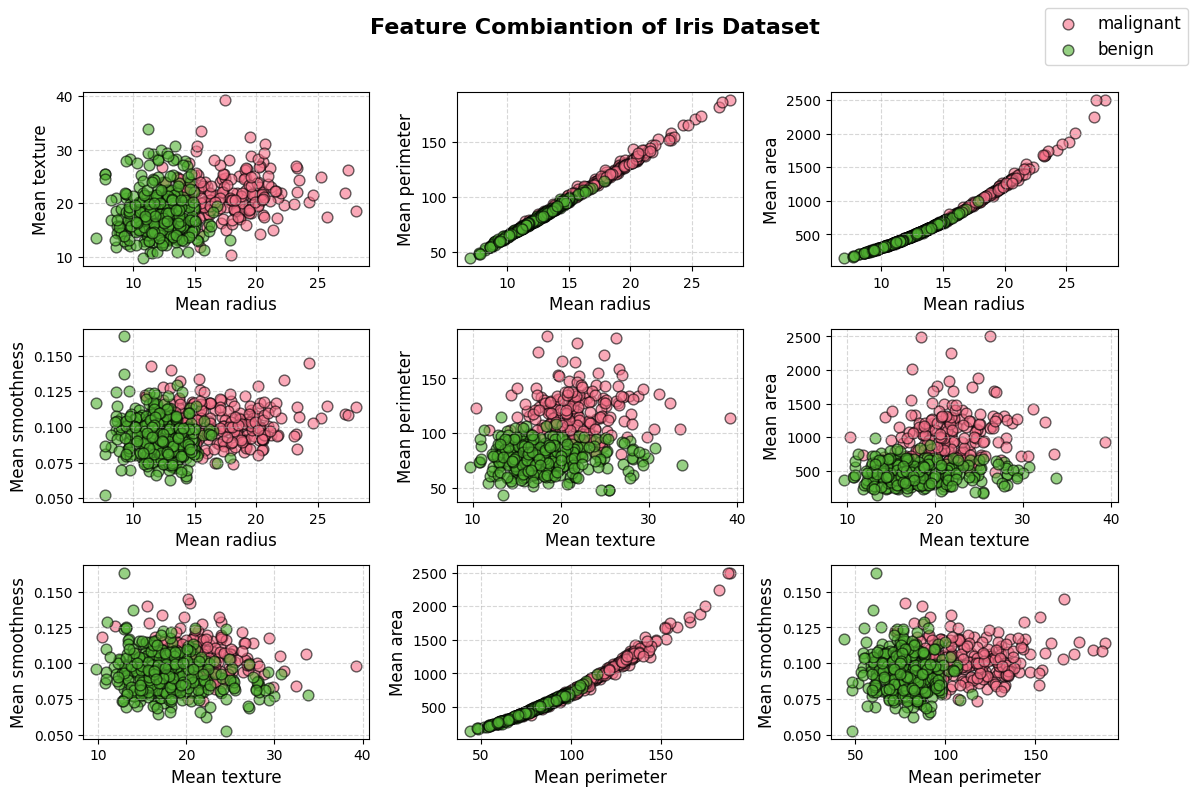

In [6]:
target_names = data.target_names
palette = sns.color_palette("husl", 3)  # Color Palette

# Subplots for the first 5 feature combination
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
fig.suptitle("Feature Combiantion of Iris Dataset", fontsize=16, fontweight='bold')
axs = axs.flatten()

plot_idx = 0
for i in range(5):
    for j in range(i + 1, 5): 
        if plot_idx == 9: break
        for color, label, target_name in zip(palette, np.unique(y), target_names):
            axs[plot_idx].scatter(X[y == label, i], X[y == label, j], 
                                  label=target_name if plot_idx == 0 else "", 
                                  color=color, alpha=0.6, edgecolor='k', s=60)
        
        if plot_idx == 9: break
        # Add labels and imporve appearence
        axs[plot_idx].set_xlabel(data.feature_names[i].capitalize(), fontsize=12)
        axs[plot_idx].set_ylabel(data.feature_names[j].capitalize(), fontsize=12)
        axs[plot_idx].tick_params(axis='both', which='major', labelsize=10)
        axs[plot_idx].grid(True, linestyle='--', alpha=0.5)
        plot_idx += 1

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=12)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

### Data Preprocessing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Scratch Model

In [9]:
# Create the model
scratch_clf = LogisticRegression(learning_rate=0.1, verbose=1)
# Take the time
start_time = time.time()
# Train the model
scratch_clf.fit(X_train, y_train)
#Print the time
custom_train_time = time.time() - start_time
print(f'The training time was {custom_train_time:.3} seconds')

Converged at 224 epoch
The training time was 0.372 seconds


In [10]:
# Make the predictions
y_pred = scratch_clf.predict(X_test)
# Create some metrics
metrics = [accuracy_score, f1_score, log_loss]
scratch_metrics = []
for metric in metrics:
    scratch_metrics.append(round(metric(y_test, y_pred), 3))

In [11]:
table = print(tabulate([scratch_metrics], 
                       headers=['Accuracy', 'F1 score', 'Log Loss'],
                       tablefmt='rounded_grid')
              )

╭────────────┬────────────┬────────────╮
│   Accuracy │   F1 score │   Log Loss │
├────────────┼────────────┼────────────┤
│      0.994 │      0.995 │      0.211 │
╰────────────┴────────────┴────────────╯


## Sk-learn model

In [12]:
from sklearn.linear_model import LogisticRegression as LogRegression

# Create the model
sk_model = LogRegression(max_iter=1000, verbose=1)
# Take the time
start_time = time.time()
# Train the model
sk_model.fit(X_train, y_train)
#Print the time
sk_train_time = time.time() - start_time
print(f'The training time was {sk_train_time:.3f} seconds')

The training time was 0.021 seconds


In [13]:
# Make the predictions
sk_pred = sk_model.predict(X_test)
# Create some metrics
sk_metrics = []
for metric in metrics:
    sk_metrics.append(round(metric(y_test, sk_pred), 3))

In [14]:
table = print(tabulate([sk_metrics], 
                       headers=['Accuracy', 'F1 score', 'Log Loss'],
                       tablefmt='rounded_grid')
              )

╭────────────┬────────────┬────────────╮
│   Accuracy │   F1 score │   Log Loss │
├────────────┼────────────┼────────────┤
│      0.982 │      0.986 │      0.632 │
╰────────────┴────────────┴────────────╯


## Model Comparison

#### Confusion Matrix

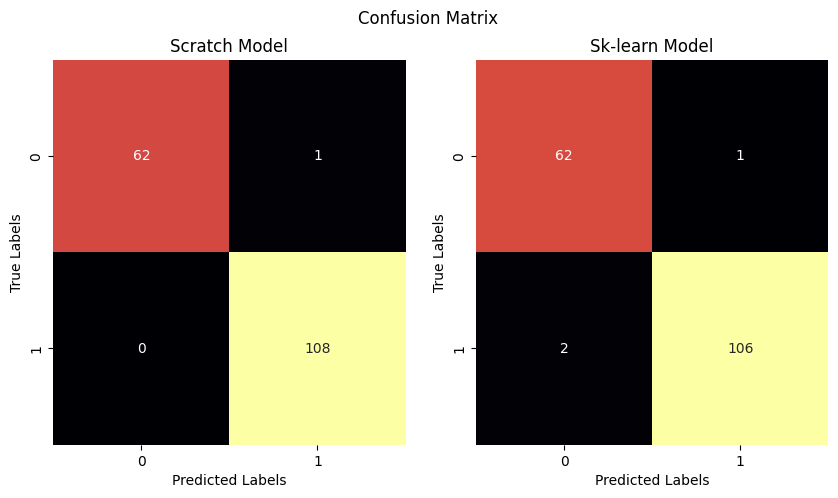

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
scratch_cm = confusion_matrix(y_test, y_pred)
sk_cm = confusion_matrix(y_test, sk_pred)

for i, cm in enumerate([scratch_cm, sk_cm]):
    sns.heatmap(cm, annot=True, fmt="d", cmap="inferno", cbar=False, ax=axs[i])
    axs[i].set_xlabel("Predicted Labels")
    axs[i].set_ylabel("True Labels")
    title = 'Scratch Model' if i == 0 else 'Sk-learn Model'
    axs[i].set_title(title)

plt.suptitle('Confusion Matrix')
plt.show()

#### Log Loss Comparison

In [16]:
import warnings
# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.linear_model')

# Store the history of the Sk-learn model
num_epochs = 224
train_losses = []

# Initialize the model
model = LogRegression(max_iter=1, warm_start=True)

for epoch in range(num_epochs):
    model.fit(X_train, y_train)  # Fit for one epoch

    # Get predictions and calculate log loss
    train_pred = model.predict_proba(X_train)[:, 1]
    train_loss = log_loss(y_train, train_pred)
    train_losses.append(train_loss)

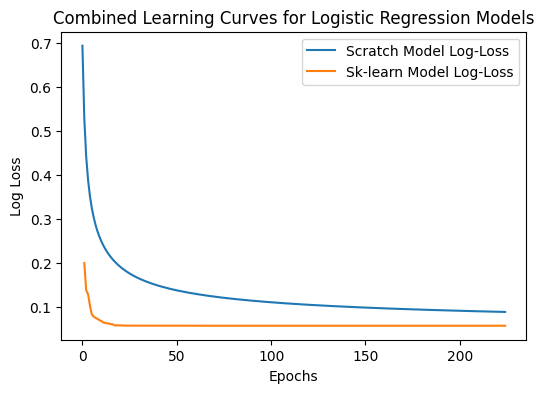

In [17]:
plt.figure(figsize=(6, 4))

# Plot custom model's learning curve
plt.plot(range(len(scratch_clf._history)), scratch_clf._history, label="Scratch Model Log-Loss")

# Plot training loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Sk-learn Model Log-Loss')

# Add labels and title
plt.title('Combined Learning Curves for Logistic Regression Models')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()

plt.show()

#### Metrics Comparison

In [18]:
# Scratch Model Metrics
scratch_metrics.insert(0, 'Scratch Model')
scratch_metrics.append(custom_train_time)

# Sklearn Model Metrics
sk_metrics.insert(0, 'Sk-learn Model')
sk_metrics.append(sk_train_time)

table = [scratch_metrics, sk_metrics]

print(tabulate(table, 
    headers=['Model', 'Accuracy', 'F1_score', 'Log Loss', 'Time'], 
    tablefmt="rounded_grid")
    )

╭────────────────┬────────────┬────────────┬────────────┬───────────╮
│ Model          │   Accuracy │   F1_score │   Log Loss │      Time │
├────────────────┼────────────┼────────────┼────────────┼───────────┤
│ Scratch Model  │      0.994 │      0.995 │      0.211 │ 0.372254  │
├────────────────┼────────────┼────────────┼────────────┼───────────┤
│ Sk-learn Model │      0.982 │      0.986 │      0.632 │ 0.0209951 │
╰────────────────┴────────────┴────────────┴────────────┴───────────╯
